## ДЗ 2 Теория информации
#### Камаев Виктор БИБ214

### Задание 1. Кодирование / декодирование

In [1]:
from collections import Counter
from random import random
import matplotlib.pyplot as plt

***Кодирование***: просто повторяем наше сообщение s раз

In [2]:
def repeat_encoding(x: str, s: int) -> str:
    return x * s

***Декодирование***: делим наше сообщение на блоки, далее выбираем из полученных самый популярный блок

In [3]:
def repeat_decoding(y: str, s: int) -> str:
    if len(y) % s:
        raise ValueError("Некорректная длина сообщения")
    block_len = len(y) // s
    blocks = [y[i * block_len: (i + 1) * block_len] for i in range(s)]
    cnt = Counter(blocks)
    return cnt.most_common(1)[0][0] 

### Задание 2. Бинарный канал

Для каждого бита выбираем случайно число из диапазона $[0;1)$. Так как это (псевдо)случаные числа, то ошибка случится с вероятностью $p$, если выбранное число $n < p$

In [4]:
def binary_channel(s: str, p: float) -> str:
    new_s = ""
    for bit in s:
        invert = (random() < p)
        new_s += bit if not invert else str(1 - int(bit))
    return new_s

Проверим как работает наш канал

In [5]:
s = repeat_encoding('1111', 5)  # закодировали сообщение (5 повторений)
for i in range(10):
    noised_msg = binary_channel(s, 0.2)  # зашумляем сообщение
    print(repeat_decoding(noised_msg, 5))

1110
1111
1111
1111
1111
1111
1111
1111
1111
0110


Видно, что т.к $p$ достаточно мало, то в *среднем* получаем правильное декодированное сообщение

### Задание 3. Исследования

Введем функцию `count_mistakes`, которая подсчитывает количество различающихся битов в 2 сообщениях

In [6]:
def count_mistakes(x: str, y: str) -> str:
    if len(x) != len(y):
        raise ValueError('Строки разной длины')
    count = 0
    for i, j in zip(x, y):
        count += (i != j)
    return count

Теперь перейдем к тестам. 

1) Чтобы оценить среднее количество ошибок при фиксированных параметрах, будем усреднять их, то есть прогонять сообщение через канал (10 раз), смотреть колличество ошибок и затем возьмем их среднее арифметическое

In [7]:
def test_for_mistakes(original_msg: str, s: int, p: float) -> float:
    encoded_msg = repeat_encoding(original_msg, s)
    mistakes = 0
    
    for j in range(10):
        noised_msg = binary_channel(encoded_msg, p)
        decoded_msg = repeat_decoding(noised_msg, s)
        mistakes += count_mistakes(original_msg, decoded_msg)

    avg_mistakes = mistakes / 10
    return avg_mistakes

In [8]:
p = 0.3
s = 3
MSG_MAX_LEN = 100
arr = [test_for_mistakes('1' * msg_len, s, p) for msg_len in range(1, MSG_MAX_LEN)]

Теперь построим первый график

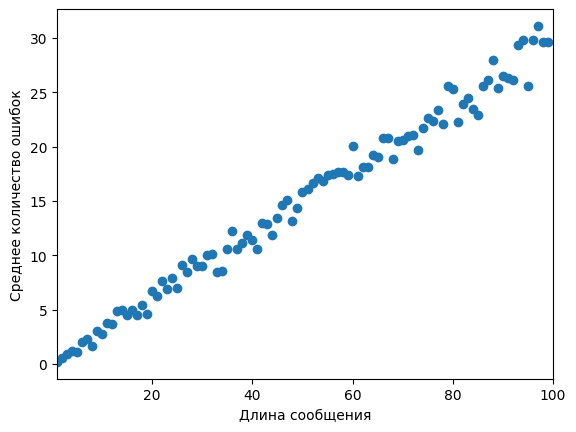

In [9]:
plt.xlabel("Длина сообщения")
plt.ylabel("Среднее количество ошибок")
plt.xlim((1, MSG_MAX_LEN))
plt.scatter(range(1, MSG_MAX_LEN), arr)

Видим, что зависимость *примерно* прямо пропорциональна. Причем угол наклона этой прямой равен $k \simeq \frac{30}{100} = 0.3 = p$

2) Теперь смотрим зависимость числа ошибок от уровня шума. Параметр двоичного канала будем брать с шагом 0.01

In [10]:
msg = '1' * 100
s = 5
arr = [test_for_mistakes(msg, s, i / 100) for i in range(101)]
noises = [i / 100 for i in range(101)]

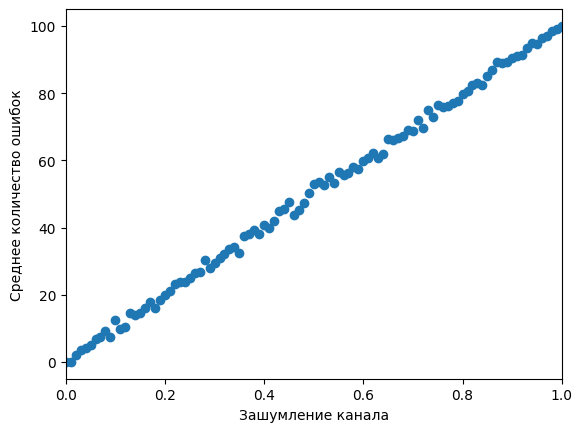

In [11]:
plt.xlabel("Зашумление канала")
plt.ylabel("Среднее количество ошибок")
plt.xlim((0, 1))
plt.scatter(noises, arr)

Опять получили прямую. Её угол наклона примерно равен $k \simeq 100$. 

Заметим, что $\frac{k}{100} = \frac{k}{len_{msg}} = 1$. То есть среднее число ошибок на 1 бит сообщения совпадает с зашумлением канала (по определению, так оно и есть)

3) Зависимость среднего количества ошибок от числа повторений

In [12]:
msg = '1' * 100
p = 0.3
MAX_S = 100
arr = [test_for_mistakes(msg, s, p) for s in range(1, MAX_S)]

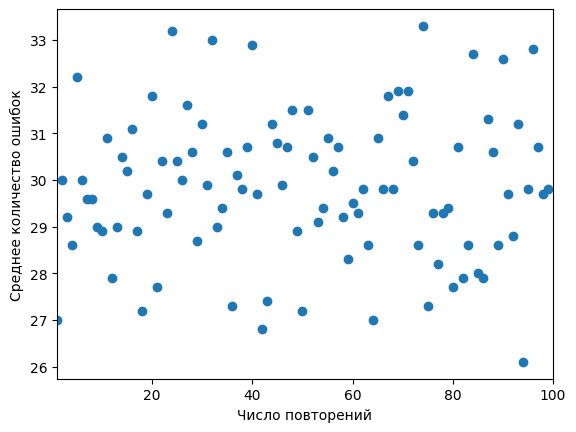

In [13]:
plt.xlabel("Число повторений")
plt.ylabel("Среднее количество ошибок")
plt.xlim((1, MAX_S))
plt.scatter(range(1, MAX_S), arr)

Видно, что число ошибок колеблется вокруг 30 (то есть $p \cdot len_{msg}$). Для наглядности уменьшу масштаб

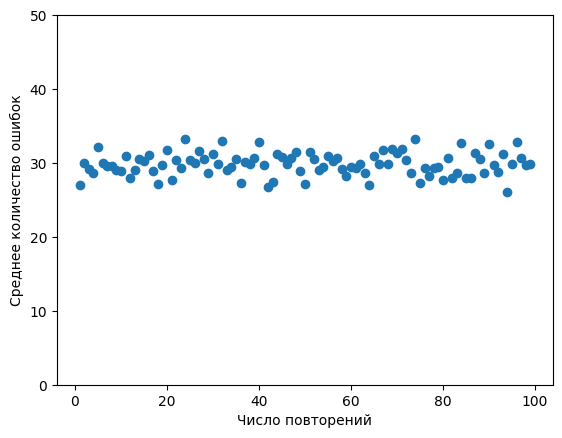

In [14]:
plt.xlabel("Число повторений")
plt.ylabel("Среднее количество ошибок")
plt.ylim((0, 50))
plt.scatter(range(1, MAX_S), arr)